In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import scipy.stats as stat

plt.style.use('ggplot')

In [2]:
# read in datasets

loan_data_inputs_train = pd.read_csv('data/loan_data_inputs_train.csv',
                                     index_col=0,
                                     low_memory=False)

loan_data_inputs_test = pd.read_csv('data/loan_data_inputs_test.csv',
                                    index_col=0,
                                    low_memory=False)

loan_data_target_train = pd.read_csv('data/loan_data_targets_train.csv',
                                     index_col=0,
                                     #header=None,
                                     low_memory=False)

loan_data_target_test = pd.read_csv('data/loan_data_targets_test.csv',
                                    index_col=0,
                                    #header=None,
                                    low_memory=False)

In [3]:
display(loan_data_inputs_train.shape,loan_data_target_train.shape, loan_data_inputs_test.shape, loan_data_target_test.shape )

(373028, 301)

(373028, 1)

(93257, 301)

(93257, 1)

# Selecting Features
We will select all of our columns we created earlier as well as remove our reference column to avoid any multicollinearity

In [4]:
needed_columns = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:NE_IA_ND_MT_MS_TN_HI_NV',
'addr_state:PA_VA_RI',
'addr_state:NY',
'addr_state:OK_MD_LA_IN',
'addr_state:FL',
'addr_state:AZ_NC_AR',
'addr_state:AL_GA_OH_MA_MI',
'addr_state:TX',
'addr_state:UT_MO_NJ_WV',
'addr_state:CA',
'addr_state:SC_CO_NM_WI_IL_MN',
'addr_state:OR_WA_KY',
'addr_state:VT_AK_NH_CT_DC',
'addr_state:ME_ID_WY_KS',
'purpose:educ_sbus_moving_other_med',
'purpose:house_home_improv_vacation',
'purpose:major_purch_car_wedding_ren_energy',
'initial_list_status:w',
'initial_list_status:f',
'verification_status:Source Verified',
'verification_status:Verified',
'verification_status:Not Verified',
'terms:36',
'terms:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5',
'emp_length:6-7',
'emp_length:8-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-47',
'mths_since_issue_d:48-51',
'mths_since_issue_d:52-56',
'mths_since_issue_d:57-60',
'mths_since_issue_d:60-83',
'mths_since_issue_d:>84',
'int_rate:<8.31',
'int_rate:8.31-9.961',
'int_rate:9.961-12.025',
'int_rate:12.025-15.327',
'int_rate:15.327-19.455',
'int_rate:19.455-23.583',
'int_rate:>23.583',
'mths_since_earliest_cr_line:<106',
'mths_since_earliest_cr_line:107-141',
'mths_since_earliest_cr_line:142-177',
'mths_since_earliest_cr_line:178-354',
'mths_since_earliest_cr_line:>354',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-3',
'inq_last_6mths:4-6',
'inq_last_6mths:>6',
'open_acc:0-4',
'open_acc:5-13',
'open_acc:14-22',
'open_acc:23-25',
'open_acc:>25',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>0',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-4',
'mths_since_last_delinq:5-23',
'mths_since_last_delinq:24-49',
'mths_since_last_delinq:>49',
'dti:<4',
'dti:3.5-7.2',
'dti:7.2-9.2',
'dti:9.2-10.8',
'dti:10.8-16',
'dti:16-18',
'dti:18-20.4',
'dti:20.4-25.2',
'dti:25.2-30',
'dti:30-35',
'dti:>35',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-95',
'mths_since_last_record:>95']


In [5]:
reference_categories = [
    'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:NE_IA_ND_MT_MS_TN_HI_NV',
'purpose:educ_sbus_moving_other_med',
'verification_status:Source Verified',
'initial_list_status:w',
'terms:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>23.583',
'mths_since_earliest_cr_line:<106',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:>25',
'pub_rec:>=5',
'total_acc:>=52',
'acc_now_delinq:>0',
'annual_inc:<20k',
'mths_since_last_delinq:>49',
'dti:16-18',
'mths_since_last_record:0-2'
]

In [6]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:,needed_columns
 ]

In [7]:
inputs_train = inputs_train_with_ref_cat.drop(reference_categories, axis=1)

# Logistic Model

In [8]:
model = LogisticRegression()

In [9]:
model.fit(inputs_train, np.array(loan_data_target_train))

C:\Users\tberv\anaconda3\envs\credit_risk\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tberv\anaconda3\envs\credit_risk\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
model.intercept_

array([0.16715594])

In [11]:
model.coef_

array([[ 1.58760928,  1.56177836,  1.33594623,  1.00350901,  0.69792641,
         0.36083383,  0.12193752,  0.18208046,  0.04345845,  0.06300466,
         0.10580362,  0.11814968,  0.09885739,  0.19836648,  0.18466506,
         0.26903631,  0.22556967,  0.32253263,  0.38894567,  0.52411896,
         0.77607558, -0.01556868,  0.29691719, -0.02515864,  0.00507772,
         0.06865449,  0.06760051,  0.04982967,  0.08941504,  0.13185283,
         0.07274542,  0.00414854,  0.0812005 , -0.25999194, -0.13018142,
         0.07936214,  0.38220199,  0.36049616,  1.45004926,  0.4581871 ,
        -0.08457473, -0.42060562, -0.61798999, -0.55660158, -0.41507922,
        -0.04604983,  0.02894494,  0.05528733,  0.13117835, -0.61710171,
         0.0513305 ,  2.35779315,  2.28545979,  1.38688571,  0.23565349,
         0.02268428, -0.08891294, -0.06355868, -0.22973652, -0.27716861,
         0.05629793,  0.11972828, -0.20164382, -0.12607756,  0.00828087,
         0.01736603,  0.04220949,  0.15296709,  0.1

In [12]:
feature_name = inputs_train.columns.values

In [13]:
summary_table = pd.DataFrame(columns = ['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(model.coef_)

# add the intercept to the top of our summary table
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table


,Feature name,Coefficients
0,Intercept,0.167156
1,grade:A,1.587609
2,grade:B,1.561778
3,grade:C,1.335946
4,grade:D,1.003509
...,...,...
90,mths_since_last_record:3-20,1.001903
91,mths_since_last_record:21-31,1.056786
92,mths_since_last_record:32-80,1.133749
93,mths_since_last_record:81-95,0.875570


# P-values

We will use multivariate p-values to determine which variables are usefull in predicting our target. <br>
There is no function of sklearn that calculates the multivariate p_value so we will create our own.

We wil craete a class that is a custom implementation of the scikit-learn logistic regression algorithm that includes calculation of p-values for the estimated coefficients. <br>
The method calculates the Fisher information matrix, which is used to estimate the Cramer-Rao lower bound (CRLB) (a measure of the minimum variance of unbiased estimators (UMVUE)). Next, the standard errors of the estimated coefficients are computed from the Cramer-Rao lower bound. <br>
These standard errors are used to calculate the z-scores of the estimated coefficients, and p-values are computed based on the z-scores. Finally, the estimated coefficients, intercept, and p-values are stored as instance variables.


In [14]:
class LogisticRegression_with_p_values:
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)
    
    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T, X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values
        


In [15]:
model = LogisticRegression_with_p_values()

In [16]:
model.fit(inputs_train, np.array(loan_data_target_train))

C:\Users\tberv\anaconda3\envs\credit_risk\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tberv\anaconda3\envs\credit_risk\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
summary_table = pd.DataFrame(columns = ['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(model.coef_)


# add the intercept to the top of our summary table
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

p_values = model.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [18]:
pd.options.display.max_rows=None
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.167156,NaN
1,grade:A,1.587609,3.604691e-16
2,grade:B,1.561778,3.452671e-26
3,grade:C,1.335946,7.184761e-23
4,grade:D,1.003509,1.117649e-15
5,grade:E,0.697926,6.387737e-09
6,grade:F,0.360834,5.330019e-04
7,home_ownership:OWN,0.121938,6.659380e-03
8,home_ownership:MORTGAGE,0.182080,3.250253e-10
9,addr_state:PA_VA_RI,0.043458,5.206259e-01


We will remove any variables that show that all categories are not statistically significant as it wouldnt make sense to remove only 1 category from a variable. <br> 
We see that mths_since_earliest_cr_line and pub_rec have high p-values for all categories so we will drop those variables.

In [19]:
high_p_values = ['mths_since_earliest_cr_line:107-141',
'mths_since_earliest_cr_line:142-177',
'mths_since_earliest_cr_line:178-354',
'mths_since_earliest_cr_line:>354',
'pub_rec:0-2',
'pub_rec:3-4']

dropped_columns = reference_categories + high_p_values

In [20]:
inputs_train = inputs_train_with_ref_cat.drop(dropped_columns, axis=1)

In [21]:
model_2 = LogisticRegression_with_p_values()
model_2.fit(inputs_train, loan_data_target_train)

C:\Users\tberv\anaconda3\envs\credit_risk\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tberv\anaconda3\envs\credit_risk\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
feature_name = inputs_train.columns.values

In [23]:
summary_table = pd.DataFrame(columns = ['Feature name'], data=feature_name)
summary_table['Coefficients'] = np.transpose(model_2.coef_)


# add the intercept to the top of our summary table
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model_2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

p_values = model_2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values

In [24]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.049483,NaN
1,grade:A,1.617582,9.017353e-17
2,grade:B,1.587488,4.094928e-27
3,grade:C,1.358186,1.119478e-23
4,grade:D,1.020721,3.079979e-16
5,grade:E,0.710156,3.108126e-09
6,grade:F,0.372476,3.221723e-04
7,home_ownership:OWN,0.128880,3.985809e-03
8,home_ownership:MORTGAGE,0.189734,4.547014e-11
9,addr_state:PA_VA_RI,0.047272,4.830643e-01


In [25]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,needed_columns]
inputs_test = inputs_test_with_ref_cat.drop(columns=dropped_columns)
inputs_test.head()


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:PA_VA_RI,addr_state:NY,...,dti:20.4-25.2,dti:25.2-30,dti:30-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-95,mths_since_last_record:>95
363361,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
289224,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
214078,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
263678,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165394,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [26]:
# use our model to predict the probability of default
y_hat_test_proba = model_2.model.predict_proba(inputs_test)

In [27]:
# As predict_proba function will provide us with 2 probabilities, one for default and one for non-default, they sum to 1 and its not necessary to keep both.
y_hat_test_proba = y_hat_test_proba[:,][:,1]

In [28]:
loan_data_target_test_temp = loan_data_target_test
loan_data_target_test_temp.reset_index(drop=True, inplace=True)

In [29]:
df_actual_predicted_probs = pd.concat([loan_data_target_test_temp, pd.DataFrame(y_hat_test_proba)], axis=1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [30]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [31]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
363361,1,0.988751
289224,1,0.984216
214078,1,0.991208
263678,1,0.988230
165394,1,0.985533


# Accuracy and AUC

In [32]:
df_actual_predicted_probs_eval = df_actual_predicted_probs
# set our cut-off threshold
tr = 0.5
# make our predictions based off the threshold
df_actual_predicted_probs_eval['y_hat_test'] = np.where(df_actual_predicted_probs_eval['y_hat_test_proba'] > tr , 1,0)
# create a confusion matrix to evaluate predictions
cm = pd.crosstab(df_actual_predicted_probs_eval['loan_data_targets_test'],df_actual_predicted_probs_eval['y_hat_test'],
           rownames = ['Actual'], colnames= ['Predicted'], normalize=True)
display(cm)
# calculate our accuracy. Sum the correct predictions and divide by total number of observations
print('Accuracy:', cm[0][0] + cm[1][1]) 

Predicted,0,1
Actual,,
0,0.000064,0.017468
1,0.000075,0.982393


Accuracy: 0.9824570809697932


Our accuracy looks great by with an unbalanced dataset like this it can be deceiving. <br>
We could use a model that only predicts non-default and get similar accuracy. <br>
Our threshold should be increased but not too conservative. We will use other evaulation metrics to decide this.

The Receiver operating characteristic curve **(ROC)** metric will evauluate and show the False positive rate against the True postive rate for all possible thresholds

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])

*The function returns 3 arrays, False Positive Rates (FPR), True Positive Rates (TPR) and Thresholds.*

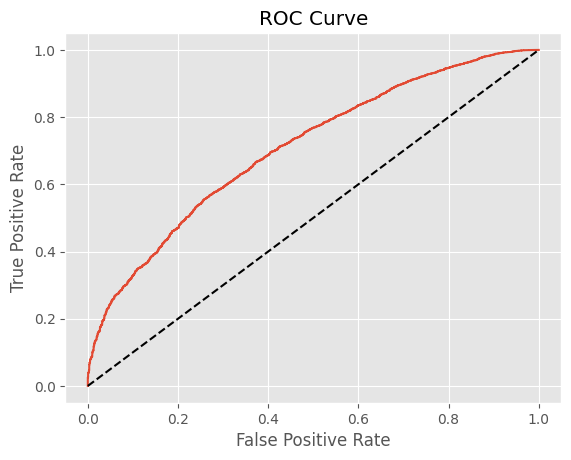

In [35]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The straight line represents the rates if our model was to predict by chance. We will use Area under the Curve (AuC) to see how much better than chance our model is. <br>
the area under the straight line is .50 for reference. <br>

In [36]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7082307996350115

.708 is not too bad but not great, <br> We will take a look at some other evaluation methods. <br>
Gini coefficient and Kolmogorov-Smirnov coefficient. Which are more widley used in the credit risk modelling. 

# Gini and Kolmogorov-Smirnov
The Gini Coefficient measures the inequality between non-defaulted and defaulted borrowers in the population <br>
 - $Gini = AUROC * 2 -1$ 
<br> 

The Kolmogorov-Smirnov coefficient will show to what extent the model seperates the good borrowers from the bad borrowers.
 - The maximum difference between the cumulative distribution function of good and bad borrowers (The bigger the difference the better)

In [37]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42398,0,0.121368,0
42303,1,0.210493,0
42348,1,0.220345,0
42234,1,0.273285,0
42235,0,0.284645,0


In [38]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# we will keep the original index incase we want to compare later

In [39]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()


In [40]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42398,0,0.121368,0,1,0,1
1,42303,1,0.210493,0,2,1,1
2,42348,1,0.220345,0,3,2,1
3,42234,1,0.273285,0,4,3,1
4,42235,0,0.284645,0,5,3,2


In [41]:
# calculate the percentags for each
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

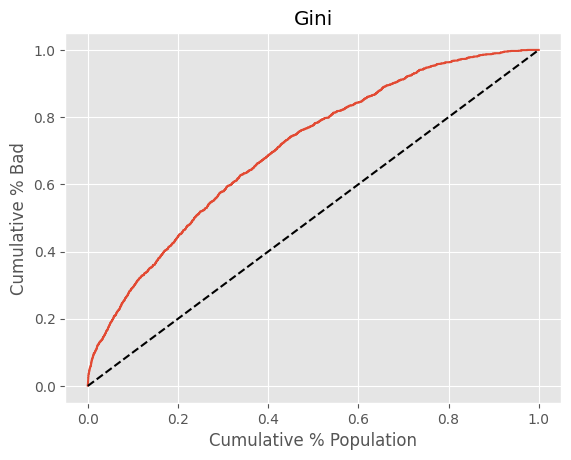

In [42]:
# PLot Gini Coefficient
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],df_actual_predicted_probs['Cumulative Perc Population'], linestyle='--', color='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')
plt.show()

In [43]:
Gini = AUROC * 2 - 1
Gini

0.4164615992700229

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

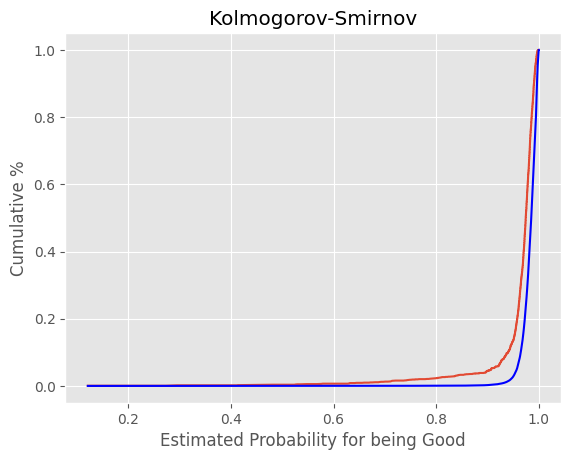

In [44]:
# plot Kolmogorov-Smirnov coefficient
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],df_actual_predicted_probs['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [45]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.29798558723893953

The plots show that the 2 distribution functions are sufficiently far away from each other and the model has satisfactory predictive power. <br>
Time to create our scorecard

# Creating a Scorecard
Our PD model must be easy to understand and interpret, so anyone can use them.  <br>
So often scorecards are used as simplified models.

In [46]:
 # We will add our reference categories back into our scorecard.
reference_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:NE_IA_ND_MT_MS_TN_HI_NV',
 'purpose:educ_sbus_moving_other_med',
 'verification_status:Source Verified',
 'initial_list_status:w',
 'terms:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>23.583',
 'mths_since_earliest_cr_line:<106',
 'delinq_2yrs:>=4',
 'inq_last_6mths:>6',
 'open_acc:>25',
 'pub_rec:>=5',
 'total_acc:>=52',
 'acc_now_delinq:>0',
 'annual_inc:<20k',
 'mths_since_last_delinq:>49',
 'dti:16-18',
 'mths_since_last_record:0-2']

In [47]:
df_ref_categories = pd.DataFrame(reference_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

In [48]:
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:NE_IA_ND_MT_MS_TN_HI_NV,0,NaN
3,purpose:educ_sbus_moving_other_med,0,NaN
4,verification_status:Source Verified,0,NaN
5,initial_list_status:w,0,NaN
6,terms:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>23.583,0,NaN


In [49]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,0.049483,NaN
1,1,grade:A,1.617582,9.017353e-17
2,2,grade:B,1.587488,4.094928e-27
3,3,grade:C,1.358186,1.119478e-23
4,4,grade:D,1.020721,3.079979e-16
5,5,grade:E,0.710156,3.108126e-09
6,6,grade:F,0.372476,3.221723e-04
7,7,home_ownership:OWN,0.128880,3.985809e-03
8,8,home_ownership:MORTGAGE,0.189734,4.547014e-11
9,9,addr_state:PA_VA_RI,0.047272,4.830643e-01


In [50]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [51]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,0.049483,NaN,Intercept
1,1,grade:A,1.617582,9.017353e-17,grade
2,2,grade:B,1.587488,4.094928e-27,grade
3,3,grade:C,1.358186,1.119478e-23,grade
4,4,grade:D,1.020721,3.079979e-16,grade
5,5,grade:E,0.710156,3.108126e-09,grade
6,6,grade:F,0.372476,3.221723e-04,grade
7,7,home_ownership:OWN,0.128880,3.985809e-03,home_ownership
8,8,home_ownership:MORTGAGE,0.189734,4.547014e-11,home_ownership
9,9,addr_state:PA_VA_RI,0.047272,4.830643e-01,addr_state


Now, we will decide for the scorecard to have a minimum score of 300 and maximum score of 850, similar to the FICO score.

In [52]:
min_score = 300
max_score = 850

We will need to find the actual minimum and maximum score we can currently get with our scorecard.

In [53]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-2.8737948715168944

In [54]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

9.61454004824991

Using the following formula we can transform our current scores to take a min-max value of 300-850 <br> <br>
$\Large{\text{variable_score} = variable\_coef\frac{(max\_score-min\_score)}{(max\_sum\_coef - min\_sum\_coef)}}$

In [55]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

Our intercept is not a variable and will need a similar but different formula. <br> <br>
$ \Large{\text{intercept_score} = \frac{(intercept\_coef - min\_score)}{max\_sum\_coef - min\_sum\_coef)}(max\_score - min\_score)+ min\_score}$

In [56]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

C:\Users\tberv\AppData\Local\Temp\ipykernel_8044\3479579332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


In [57]:
df_scorecard['Score - Final'] = df_scorecard['Score - Calculation'].round()

min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()

print(f'Minimum Score: {min_sum_score_prel} \nMaximum Score: {max_sum_score_prel}')

Minimum Score: 300.0 
Maximum Score: 850.0


---
Scores look perfect, we can now use our scorecard on borrowers

# Calculate Credit Score

We will need to add a column for our intercept into our dataframe

In [58]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [59]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,dti:25.2-30,dti:30-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-95,mths_since_last_record:>95
363361,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
289224,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
214078,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
263678,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165394,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [60]:
# arrange our columns to match our scorecard
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:PA_VA_RI,...,delinq_2yrs:>=4,inq_last_6mths:>6,open_acc:>25,pub_rec:>=5,total_acc:>=52,acc_now_delinq:>0,annual_inc:<20k,mths_since_last_delinq:>49,dti:16-18,mths_since_last_record:0-2
363361,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289224,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
214078,1,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
263678,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
165394,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores.shape

(110,)

In [62]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 110)

Our scorecard df is only 1 dimension compared to our inputs df which is 2, we will to transform the scorecard df to match so we have no issues with running calculations

In [63]:
scorecard_scores = scorecard_scores.values.reshape(110,1)
scorecard_scores.shape

(110, 1)

we will now compute the dot product of both matrices

In [64]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores.head()

,0
363361,624.0
289224,610.0
214078,634.0
263678,620.0
165394,611.0


# From Credit Score to PD
now that we have an easy to use credit score we will want to be able to turn it back into a value of probablity of default <br> <br>
$ \Large{sum\_of\_coef\_from\_score = \frac{(total\_score - min\_score)}{(max\_score - min\_score)}(max\_sum\_coef - min\_sum\_coef) + min\_sum\_coef}$

In [65]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [66]:
# caluclate probabilty from score
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
363361,0.988826
289224,0.984709
214078,0.991076
263678,0.987777
165394,0.985047


# Setting the cut-off

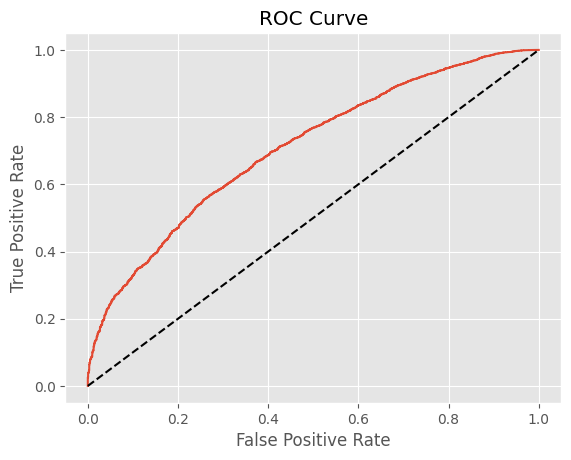

In [67]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [73]:
thresholds.shape

(3527,)

In [74]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis=1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [75]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.999706,0.0,0.000000
1,0.999706,0.0,0.000011
2,0.999235,0.0,0.003460
3,0.999234,0.0,0.003482
4,0.999156,0.0,0.005566


In [90]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10,16)

We will calculate the score from the probability that the loan will be good. <br> <br>
$ \large{score\_from\_prob = (\ln\frac{prob\_good}{1 - prob\_good} - min\_sum\_coef)\frac{(max\_score - min\_score)}{(max\_sum\_coef - min\_sum\_coef)} + min\_score} $

In [91]:
df_cutoffs['Score'] = ((np.log((df_cutoffs['thresholds']) / (1-df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()

In [92]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,1367.0
1,0.999706,0.0,0.000011,785.0
2,0.999235,0.0,0.003460,743.0
3,0.999234,0.0,0.003482,743.0
4,0.999156,0.0,0.005566,738.0


The threshold score is way our of our range so will will replace it with our maximum score.

In [96]:
df_cutoffs['Score'][0] = max_score
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0,0.000000,850.0
1,0.999706,0.0,0.000011,785.0
2,0.999235,0.0,0.003460,743.0
3,0.999234,0.0,0.003482,743.0
4,0.999156,0.0,0.005566,738.0


Now to see our approval and rejection rates.

In [97]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [98]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [105]:
df_cutoffs.sample(20)

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
2152,0.971942,0.565138,0.810111,583.0,75148,18109,0.805816,0.194184
1958,0.974071,0.510703,0.773799,586.0,71732,21525,0.769186,0.230814
2808,0.960885,0.760245,0.928827,568.0,86344,6913,0.925872,0.074128
830,0.986267,0.190826,0.462116,615.0,42652,50605,0.457360,0.542640
2139,0.972099,0.561468,0.807644,583.0,74916,18341,0.803328,0.196672
881,0.985691,0.204281,0.481042,613.0,44408,48849,0.476189,0.523811
995,0.984364,0.234862,0.523139,609.0,48315,44942,0.518084,0.481916
53,0.997972,0.001223,0.038702,700.0,3548,89709,0.038045,0.961955
1227,0.982012,0.300917,0.591495,603.0,54686,38571,0.586401,0.413599
52,0.997972,0.000612,0.038702,700.0,3547,89710,0.038035,0.961965


We can see for the different thresholds our different approval and rejection rates. We can now pick a score appropriate to what we want to achieve, more business but take on some riskier loans? less business but much safer loans?

In [121]:
list(df_scorecard['Original feature name'].unique())

['Intercept',
 'grade',
 'home_ownership',
 'addr_state',
 'purpose',
 'initial_list_status',
 'verification_status',
 'terms',
 'emp_length',
 'mths_since_issue_d',
 'int_rate',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'total_acc',
 'acc_now_delinq',
 'annual_inc',
 'mths_since_last_delinq',
 'dti',
 'mths_since_last_record',
 'mths_since_earliest_cr_line',
 'pub_rec']

Using these features we can now implement our scorecard with the choice of credit score cutoff.

# Model Maintenance

After a some time of using the model we may need to monitor how the model is tracking to see if our population has potentially changed. <br>
We can do this after a certain time like 6 months or after a number of applications such as acquiring 100,000 new applications (data points)  <br>

A common way to compare our new data is by using the Population Stability Index (PSI). This will evaluate if our new data is too different from the original data.


$\Large{ \text{PSI} = \sum^k_{j=1} [(\%  actual_j - \% expected_j) \cdot \ln(\frac{\% actual_j}{\% expected_j})]}$

<br> Actual is our new data, and expected is our old data. This will return a value of 0-1 where 0 represents no difference and 1 is completely different.

|  |  |
|---|---|
| **PSI = 0** | No difference |
| **PSI < 0.1** | Little to no difference |
| **0.1 < PSI < 0.25** | Little difference (No action) |
| **PSI > 0.25** | Big difference (Action taken) |

<br>
Using this table we can decide how to take action